In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from sklearn.preprocessing import LabelEncoder
import copy



import time
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementClickInterceptedException

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
# Loading the Input File
# df = pd.read_excel('TextAnalyticsCase.xlsx',sheet_name='Hotel_reviews')
df = pd.read_csv('Bigcase_cleaned.csv')
df.head()

,Unnamed: 0,Customer Review,text,Language,review_clean
0,0,Review 1,travel alot and really enjoyed my stay here th...,en,travel alot really enjoyed stay hotel clean st...
1,1,Review 2,stayed one night for seminar at the university...,en,stayed one night seminar university clean comf...
2,2,Review 3,stayed at the the bw downtown on two separate ...,en,stay bw downtown two separate business trip ac...
3,3,Review 4,this is my first year to go to with group of q...,en,first year go group quilter southeast kansas i...
4,4,Review 5,travel with several friends we re from small t...,en,travel several friend small town girl weekend ...


## Language Detector

In [ ]:
def detect_language_gog(text):
    translator = google_translator()
    temp = translator.detect(text)
    time.sleep(0.5)
    return(temp)

def detect_language(text):
    return(langdetect.detect(text))

## Language Translator

In [ ]:
from google_trans_new import google_translator
import time
import langdetect

def translate(text):
    translator = google_translator()
    translatedText = translator.translate(text)
    time.sleep(0.5)
    return translatedText.lower()

In [ ]:
# Detecting the language with langdetect
df['Language'] = df['text'].apply(detect_language)

In [ ]:
# Collecting Non English Indexes
Non_English_Index = df[df['Language'] != 'en'].index

In [ ]:
# Passing the Non English Index through google translator to detect any undetected text in LangDetect Library
driver_path  = "C:\Program Files\Drivers\msedgedriver.exe"
driver = webdriver.Edge(executable_path=driver_path)
for i in Non_English_Index:    
    driver.implicitly_wait(0.5)
    #launch URL
    driver.get("https://translate.google.com/")
    #identify search box
    time.sleep(2)
    m = driver.find_element_by_xpath('/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[1]/span/span/div/textarea')
    #enter search text
    m.send_keys(str(df.loc[i,'text']))
    #perform Google search with Keys.ENTER
    m.send_keys(Keys.ENTER)
    time.sleep(5)
    t = driver.find_element_by_xpath('/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[3]/c-wiz[2]/div[6]/div/div[1]')
    df.loc[i,'text'] = t.text

In [ ]:
# Detecting the language with langdetect
df['Language'] = df['text'].apply(detect_language)

In [ ]:
df[df['Language'] != 'en']

,Customer Review,text,Language


In [ ]:
from dateutil import parser
def is_date(str_):
    try:
        parser.parse(str_)
        return True
    except:
        return False

def Formatting(text):
    text = str(text)
    text=text.lower()
    # Removing date from the text
    text = ' '.join([w for w in text.split() if not is_date(w)])
    text = ' '.join([w for w in text.split() if len(w) > 1])
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Removing addressings
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(charac for charac in text if charac <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
df['text'] = df['text'].apply(Formatting)

In [ ]:
df

,Customer Review,text,Language
0,Review 1,travel alot and really enjoyed my stay here th...,en
1,Review 2,stayed one night for seminar at the university...,en
2,Review 3,stayed at the the bw downtown on two separate ...,en
3,Review 4,this is my first year to go to with group of q...,en
4,Review 5,travel with several friends we re from small t...,en
...,...,...,...
195,Review 196,we try to use any excuse to celebrate weekend ...,en
196,Review 197,the sorella is nice contemporary hotel quiet f...,en
197,Review 198,this is always one of my favorites in houston ...,en
198,Review 199,schzen rooms and are very well furnished what ...,en


In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["review_clean"] = df["text"].apply(lambda x: clean_text(x))

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 45.0 MB/s 
     |████████████████████████████████| 6.5 MB 12.4 MB/s 
     |████████████████████████████████| 596 kB 19.0 MB/s 
     |████████████████████████████████| 127 kB 45.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.3 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.

In [ ]:
!pip install tokenizers

In [ ]:
# Loading Dependencies
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers

from tokenizers import BertWordPieceTokenizer

In [ ]:
# Loading the Input File
df_2 = pd.read_csv('Hotel_Reviews.csv')
df_2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
df_pos = df_2[df_2['Negative_Review'] == "No Negative"][['Positive_Review','Reviewer_Score']]

In [ ]:
df_neg = df_2[df_2['Positive_Review'] == "No Positive"][['Negative_Review','Reviewer_Score']]

In [ ]:
df_pos[df_pos['Reviewer_Score'] < 7]

,Positive_Review,Reviewer_Score
154,Bar and restraint staff were great reception ...,6.7
319,breakfast,3.8
337,Management impersonal and unhelpful when we a...,2.9
355,The hotel building is amazing They are renova...,6.3
363,Plain 4 stars Hotel nothing special nothing bad,5.4
...,...,...
514880,Staff are rude and dont know how to treat guests,2.9
514939,Nothing,3.8
515341,The room was not even for single bed we have ...,6.7
515381,More cheaper Big rooms,5.8


In [ ]:
def pos_scoring(x):
    if x > 7:
        return(1)
    else:
        return(0)

def neg_scoring(x):
    if x < 7.12:
        return(-1)
    else:
        return(0)
    
    
df_pos['Label'] = df_pos['Reviewer_Score'].apply(pos_scoring)
df_neg['Label'] = df_neg['Reviewer_Score'].apply(neg_scoring)

In [ ]:
df_pos.columns = ['Review', 'Reviewer_Score', 'Label']
df_neg.columns = ['Review', 'Reviewer_Score', 'Label']

In [ ]:
df_ = pd.concat([df_pos,df_neg],axis =0)

In [ ]:
df_train = df_.groupby('Label', group_keys=False).apply(lambda x: x.sample(5000)).sample(frac = 1)

In [ ]:
df_train['Label'].value_counts()

 0    5000
 1    5000
-1    5000
Name: Label, dtype: int64

In [ ]:
df_validate = df_.groupby('Label', group_keys=False).apply(lambda x: x.sample(5000)).sample(frac = 1)

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
#IMP DATA FOR CONFIG
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None
    
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

AUTO = tf.data.experimental.AUTOTUNE


# Configuration
EPOCHS = 5
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 512

Running on TPU  grpc://10.95.92.66:8470
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.95.92.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.95.92.66:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)

In [ ]:
x_train = fast_encode(df_train.Review.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_validate = fast_encode(df_validate.Review.astype(str), fast_tokenizer, maxlen=MAX_LEN)

from tensorflow.keras.utils import to_categorical
y_train =  to_categorical(df_train.Label,num_classes = 3)
y_validate = to_categorical(df_validate.Label,num_classes = 3)

100%|██████████| 59/59 [00:02<00:00, 20.82it/s]


In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

Validation_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_validate, y_validate))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)


In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(3, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
with strategy.scope():
    transformer_layer = (
        transformers.TFDistilBertModel
        .from_pretrained('distilbert-base-multilingual-cased')
    )
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_distil_bert_model_4 (TFD  TFBaseModelOutput(last_h  134734080
 istilBertModel)             idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_4   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_4 (Dense)             (None, 3)                 2307      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=Validation_dataset,
    epochs=5)

Epoch 1/5
117/117 [==============================] - 116s 447ms/step - loss: 0.8992 - accuracy: 0.5517 - val_loss: 0.6747 - val_accuracy: 0.6764
Epoch 2/5
117/117 [==============================] - 39s 333ms/step - loss: 0.6238 - accuracy: 0.7077 - val_loss: 0.5782 - val_accuracy: 0.7313
Epoch 3/5
117/117 [==============================] - 39s 335ms/step - loss: 0.5665 - accuracy: 0.7360 - val_loss: 0.5620 - val_accuracy: 0.7413
Epoch 4/5
117/117 [==============================] - 39s 335ms/step - loss: 0.5303 - accuracy: 0.7569 - val_loss: 0.5434 - val_accuracy: 0.7524
Epoch 5/5
117/117 [==============================] - 39s 335ms/step - loss: 0.5059 - accuracy: 0.7682 - val_loss: 0.5364 - val_accuracy: 0.7587


In [ ]:
x_test = fast_encode(df.text.astype(str), fast_tokenizer, maxlen=MAX_LEN)

100%|██████████| 1/1 [00:00<00:00,  6.74it/s]


In [ ]:
import numpy as np
df['Label'] = np.argmax(model.predict(x_test),axis=1)

In [ ]:
df[df.Label == 2]

,Unnamed: 0,Customer Review,text,Language,review_clean,Label
6,6,Review 7,attending business conference at the universit...,en,attend business conference university room lar...,2
16,16,Review 17,good points excellent location minute walk to ...,en,good point excellent location minute walk cent...,2
18,18,Review 19,stood nights at this hotel with my mother shop...,en,stood night hotel mother shopping trip booking...,2
26,26,Review 27,there is downside to tripadvisor that shows it...,en,downside tripadvisor show face occasionally se...,2
34,34,Review 35,just got back from my labor day weekend at the...,en,get back labor day weekend sherry go heart bea...,2
48,48,Review 49,glowing review hilton garden inn energy corrid...,en,glow review hilton garden inn energy corridor ...,2
75,75,Review 76,the camera is an american standard or always t...,en,camera american standard always large one pers...,2
88,88,Review 89,if were to run hotel do it the way it done by ...,en,run hotel way do staff sherry netherland tell ...,2
89,89,Review 90,the westin memorial city opened in the spring ...,en,westin memorial city open spring midrise hotel...,2
95,95,Review 96,my new favorite hotel in new york will definit...,en,new favorite hotel new york definitely stay ho...,2


In [ ]:
def Labels(x):
  if x == 1:
    return('Positive')
  elif x == 2:
    return('Negative')
  else:
    return('Neutral')
df.Label = df.Label.apply(Labels)

([<matplotlib.axis.XTick at 0x7f0108e50f90>,
 [Text(0, 0, 'Positive'), Text(0, 0, 'Negative'), Text(0, 0, 'Neutral')])

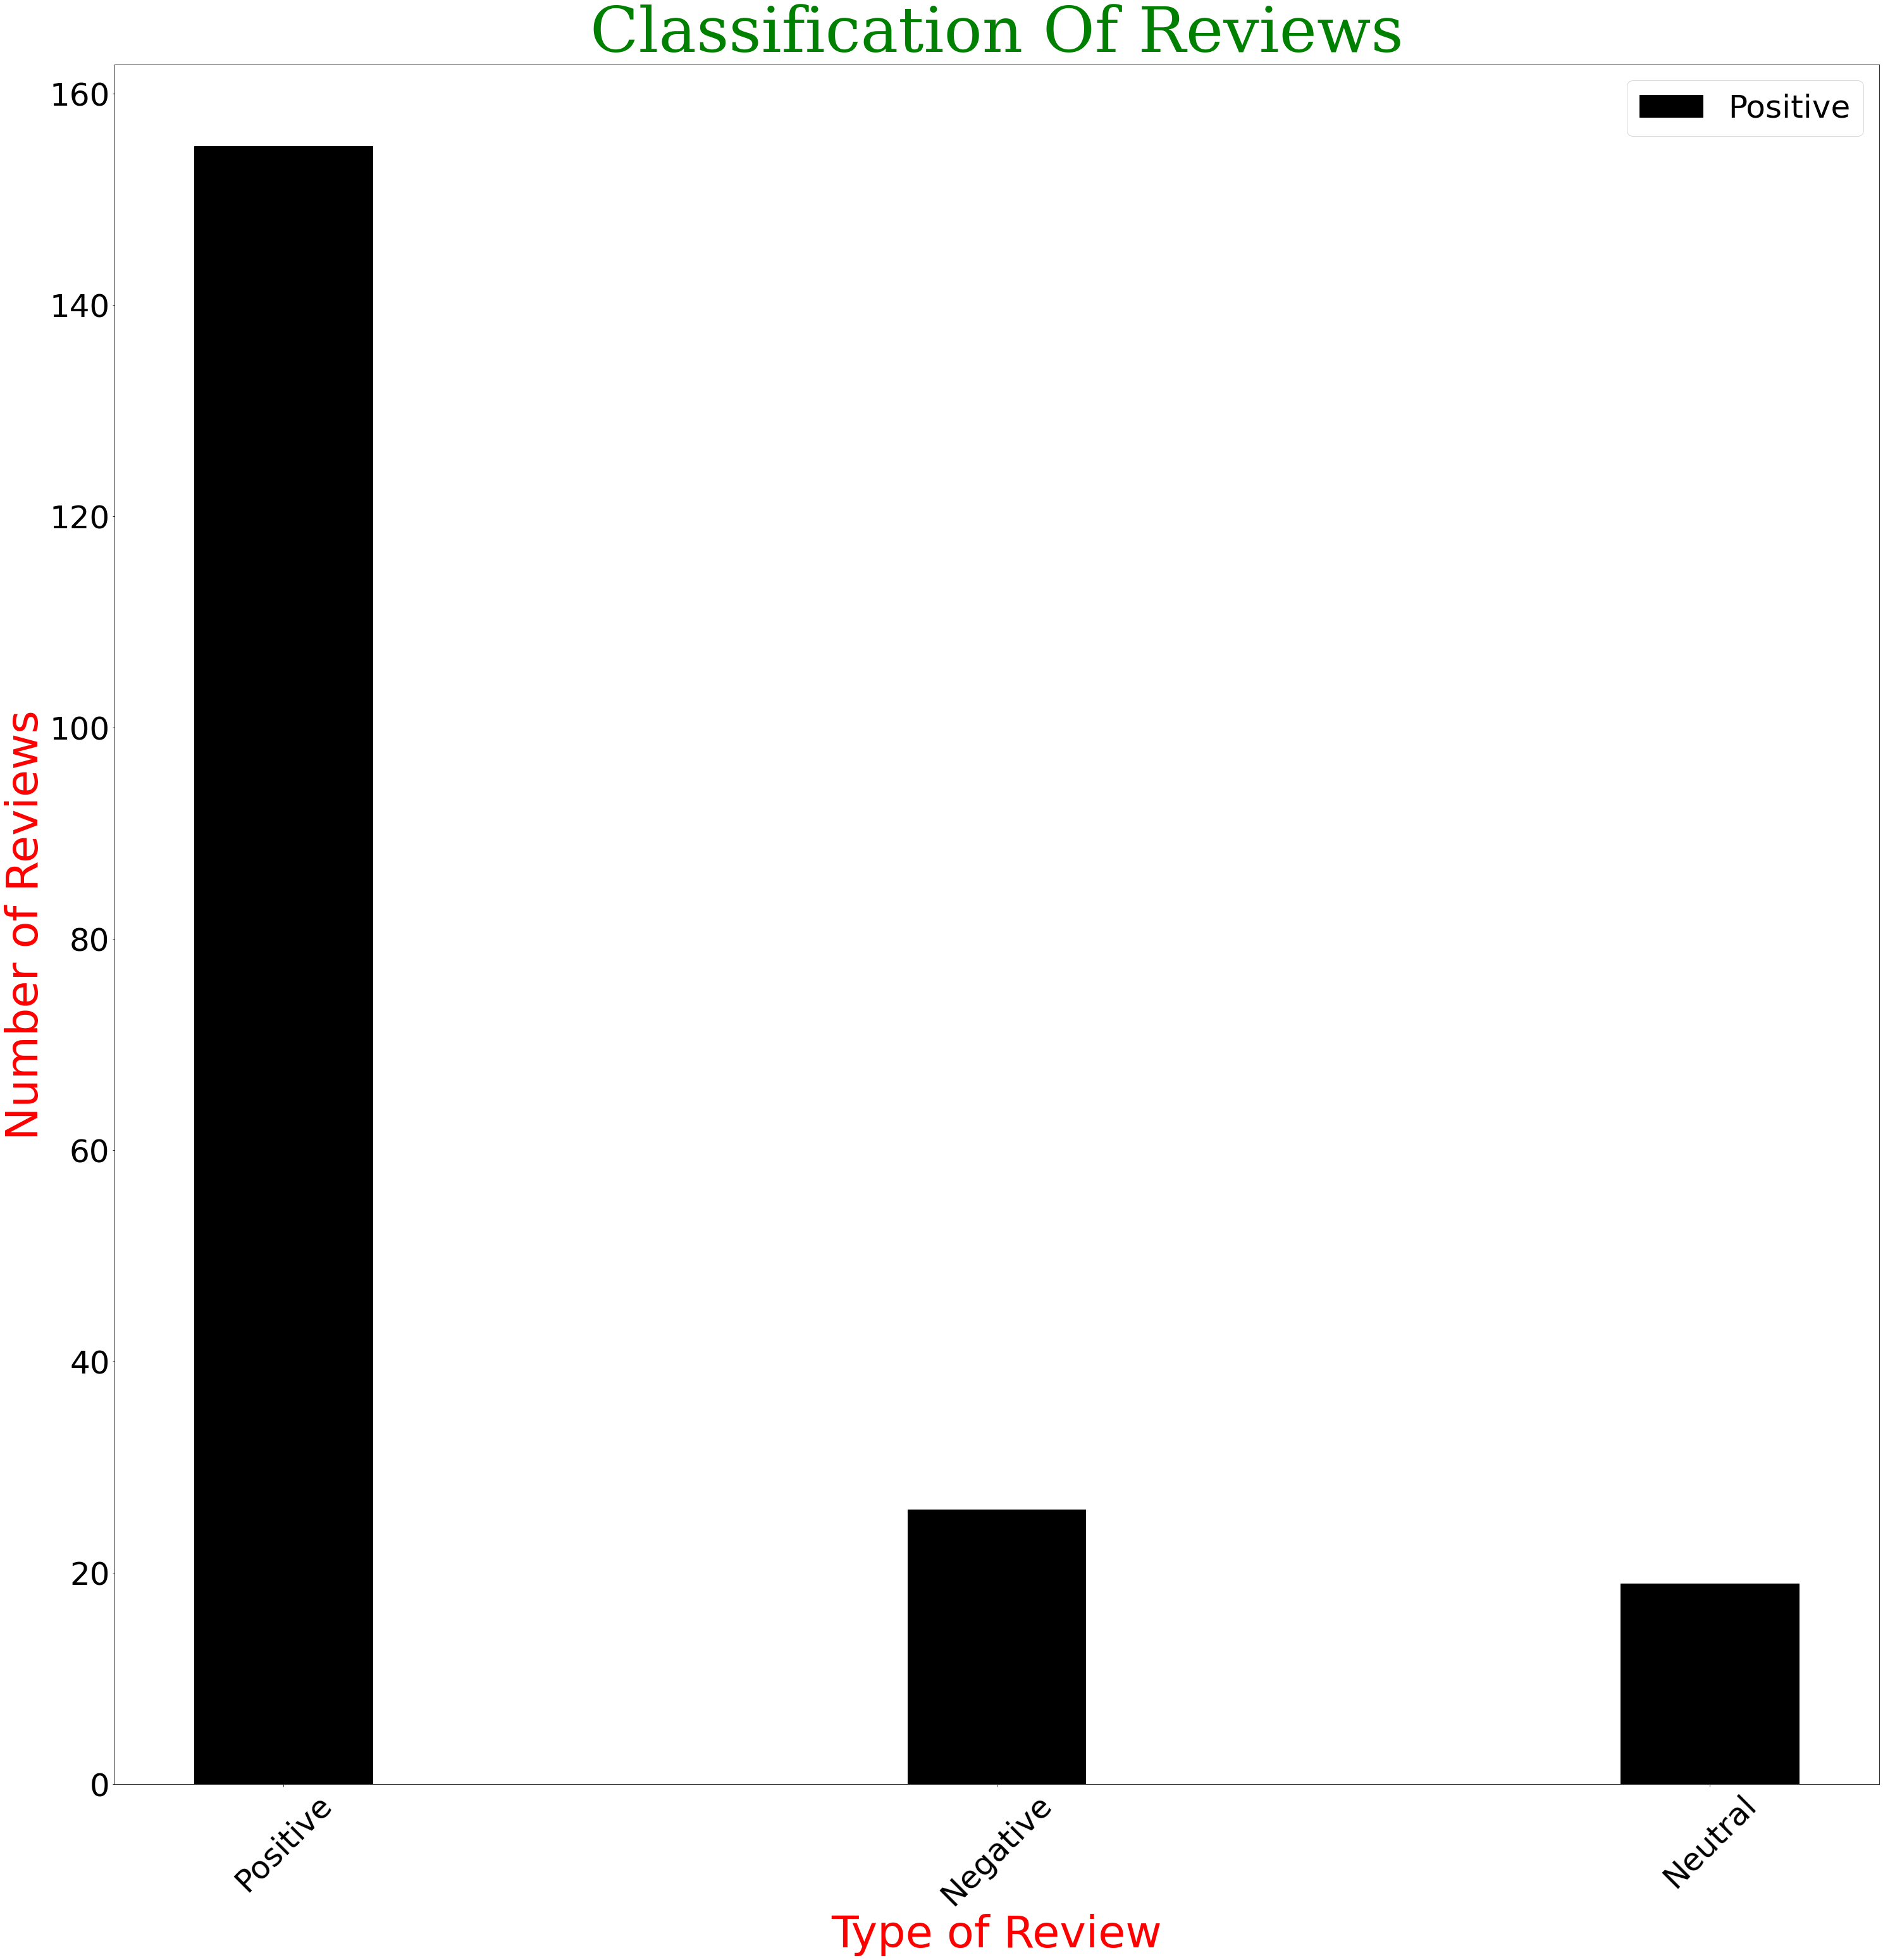

In [ ]:
serif_font = {'fontname':'serif'}
r = np.arange(3)
width = 0.25

plt.figure(figsize=(50,50))
  
plt.bar(r, list(df.Label.value_counts()), color = 'black',
        width = width, edgecolor = 'black',
        label='Classification Of Reviews')

plt.xticks(size = 50,rotation = 45)
plt.yticks(size = 50)

plt.xlabel("Type of Review",fontsize = 70,color ='r')
plt.ylabel("Number of Reviews",fontsize = 70,color ='r')
plt.title("Classification Of Reviews",size =  100,**serif_font,color = 'Green')

plt.legend(['Positive', 'Negative','Neutral'], loc ="upper right",fontsize = 50)
  
# plt.grid(linestyle='--')
plt.xticks(r,['Positive', 'Negative','Neutral'])



In [ ]:
# Positive_Reviews = df[df.Label=='Positive']
Negative_Reviews = df[df.Label=='Negative']
Neutral_Reviews = df[df.Label=='Neutral']

In [ ]:
Negative_Reviews.text[6]

'attending business conference at the university room was large with two comfortable beds and adequate pillows as is common in many hotels the chair and hassock were too stylish to be practical and comfortable useless to try to sit put for feet up and read would take balancing act desk and work space were superior nice in room lavazza coffee set up bathroom was superior spacious clean shower was water saver head but worked pretty well asked for late check out and this was not problem also the screw came out of my reading glasses and when asked at the front desk for some tape yes nerd style to wrap around the hinge surprise the desk clerk pulled out tiny optical screw driver be aware parking is night for guests but some room rates include this bar and restaurant food and drinks were good and service was very pleasant but both dinner and breakfast the wait staff seemed to disappear for minutes right when was ready to pay and leave might have been light on the staff hotel is circuitous mi

# Positive Reviews

In [ ]:
# return the wordnet object value corresponding to the POS tag
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

stop = stopwords.words('english')
stop+= ['sorella','comf','perfor','mi','st','dtype','p','aaa','aandf','yogurt','orange','aback','ta','dw','also','another','nyc','cab','etc','houston','back','us']
st = ['new york','san carlos','central park','sherry netherland','harry cipriani','yr old','adult per', 'adults teens',]
def clean_text(text):
    # lower text
    text = text.lower()
    for i in st:
        text = text.replace(i,'')
    # tokenize text and remove puncutation
#     text = [word.strip(string.punctuation) for word in text.split()]
    # remove words that contain numbers
    text = [word for word in text.split() if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
# Positive_Reviews["review_clean"] = Positive_Reviews["text"].apply(lambda x: clean_text(x))
Negative_Reviews["review_clean"] = Negative_Reviews["text"].apply(lambda x: clean_text(x))
Neutral_Reviews["review_clean"] = Neutral_Reviews["text"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Clustering

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2),min_df= 2,max_df = 5)
tfidf_result = tfidf.fit_transform(Positive_Reviews['review_clean']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
# tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_df

,able use,absolutely love,accommodate,accommodating highly,across street,activities,addition,address,adequate,adjoining,...,wow,wow really,yard,yard house,year old,year trip,yet,yogurts,young,younger
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.215676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.22898,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
151,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.185566,0.00000,0.0,0.0,0.0,0.0
152,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
153,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0


In [ ]:
tfidf_final = tfidf_df.set_index(Positive_Reviews['Customer Review'])

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist
k = np.arange(2,10)
distortion = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(tfidf_final)
    pred = model.predict(tfidf_final)
    distortion.append(sum(np.min(cdist(tfidf_final,model.cluster_centers_,'euclidean'),axis = 1))/tfidf_final.shape[0])

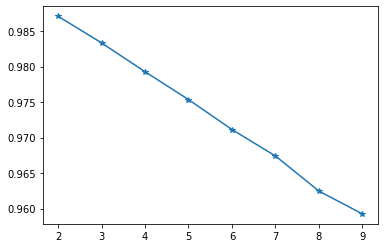

In [ ]:
plt.plot(k,distortion,marker ='*')

In [ ]:
model = KMeans(n_clusters = 3)
model.fit(tfidf_final)
pred = model.predict(tfidf_final)
Positive_Reviews['Cluster'] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
Positive_Reviews.Cluster.value_counts()

0    89
1    36
2    30
Name: Cluster, dtype: int64

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1),min_df= 6)
tfidf.fit_transform(Positive_Reviews['review_clean'])
most_common_1 = tfidf.get_feature_names()

tfidf = TfidfVectorizer(ngram_range=(2,2),min_df= 6)
tfidf.fit_transform(Positive_Reviews['review_clean'])
most_common_2 = tfidf.get_feature_names()
# tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def remove_common(text):
    for i in most_common_2:
        text = text.replace(i,'')
    text = " ".join([w for w in text.split() if w not in most_common_1])
    return(text)

# clean text data
Positive_Reviews["Final_Text"] = Positive_Reviews["review_clean"].apply(lambda x: remove_common(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Negative_Reviews = pd.read_csv('Neg_Reviews.csv')

In [ ]:
Positive_Reviews.to_csv('Pos_Reviews.csv')
Negative_Reviews.to_csv('Neg_Reviews.csv')
Neutral_Reviews.to_csv('Neutral_Reviews.csv')

In [ ]:
Positive_Reviews

,Unnamed: 0,Customer Review,text,Language,review_clean,Label,Cluster,Final_Text
0,0,Review 1,travel alot and really enjoyed my stay here th...,en,travel alot really enjoyed stay hotel clean st...,Positive,0,travel alot campus soon
1,1,Review 2,stayed one night for seminar at the university...,en,stayed one night seminar university clean comf...,Positive,2,seminar university squeaky temp cool full air ...
2,2,Review 3,stayed at the the bw downtown on two separate ...,en,stayed bw downtown two separate business trips...,Positive,2,bw separate trips office although availble cha...
3,3,Review 4,this is my first year to go to with group of q...,en,first year go group quilter southeast kansas i...,Positive,2,group quilter southeast kansas international q...
4,4,Review 5,travel with several friends we re from small t...,en,travel several friends small town girl weekend...,Positive,2,travel friends girl international quilt festiv...
...,...,...,...,...,...,...,...,...
194,194,Review 195,the hotel was super clean nice modern retro de...,en,hotel super clean nice modern retro design sta...,Positive,0,retro design jr pretty roomy pretty pricey del...
195,195,Review 196,we try to use any excuse to celebrate weekend ...,en,try use excuse celebrate weekend hotel fact mi...,Positive,0,try excuse celebrate fact miles lavish fact fe...
196,196,Review 197,the sorella is nice contemporary hotel quiet f...,en,nice contemporary hotel quiet hotel traveler a...,Positive,0,contemporary traveler developing nicely traveler
197,197,Review 198,this is always one of my favorites in houston ...,en,always one favorites based price performance h...,Positive,0,favorites based performance house usual garden...


# LDA

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2ca6e0a550ec111041cb81f86941dcb8778c2ec8feba7cdf6f96aa502eca16d4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=2,# minimum required occurences of a word
ngram_range = (3,4)                           )
data_matrix = vectorizer.fit_transform(Positive_Reviews.review_clean)

In [ ]:
lda_model = LatentDirichletAllocation(
n_components=3, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1 )
                                     
lda_output = lda_model.fit_transform(data_matrix)

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  42.675694
0      -387.996002  -373.316162       2        1  34.276216
2     -2184.745605   -60.565800       3        1  23.048090, topic_info=                         Term      Freq     Total Category  logprob  loglift
65    within walking distance  5.000000  5.000000  Default  30.0000  30.0000
44       staff always helpful  3.000000  3.000000  Default  29.0000  29.0000
3     clean comfortable staff  3.000000  3.000000  Default  28.0000  28.0000
36          one bedroom suite  3.000000  3.000000  Default  27.0000  27.0000
47     staff friendly helpful  7.000000  7.000000  Default  26.0000  26.0000
..                        ...       ...       ...      ...      ...      ...
4       clean well maintained  0.317583  3.503509   Topic3  -4.7793  -0.9332
47     staff friendly helpful  0.324750  7.111860   Topic3  -4.7570  -1.6189
46  staff friendly especially  0.313042  3.794281   Topic3  -4.7937  -1.0273
59      well equipped fitness  0.311625  3.118724   Topic3  -4.7982  -0.8358
12             flat screen tv  0.311395  3.130577   Topic3  -4.7990  -0.8403

[140 rows x 6 columns], token_table=      Topic      Freq                                  Term
term                                                       
0         2  0.619763        accommodating highly recommend
1         2  0.625721  accommodating highly recommend hotel
2         2  0.508178                clean comfortable room
3         1  0.282232               clean comfortable staff
3         3  0.846695               clean comfortable staff
...     ...       ...                                   ...
63        1  0.552553                   within easy walking
64        1  0.545976          within easy walking distance
65        2  0.874922               within walking distance
66        1  0.457433                 would definitely stay
66        2  0.457433                 would definitely stay

[82 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
# wordcloud function
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Verdana.ttf',
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(str(data))

    fig = plt.figure(1, figsize = (50, 50))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 10 words for topic #0:
['hotel clean well maintained', 'hotel clean well', 'stayed one night', 'clean comfortable room', 'free wi fi', 'room clean modern', 'well equipped fitness', 'flat screen tv', 'hotel well maintained', 'well maintained clean', 'hotel well maintained clean', 'clean well maintained', 'highly recommend hotel', 'free continental breakfast', 'within walking distance']


Top 10 words for topic #1:
['within easy walking distance', 'hotel great location', 'goes way make sure', 'goes way make', 'would definitely stay', 'white gloved elevator', 'white gloved elevator operators', 'gloved elevator operators', 'easy walking distance', 'staff friendly especially', 'eggs bacon sausage', 'friendly helpful staff', 'hilton garden inn', 'front desk staff', 'staff friendly helpful']


Top 10 words for topic #2:
['hotel great location', 'staff friendly really', 'stay drury inn', 'stayed executive suite', 'upper east side', 'jo sonny john', 'updated rooms great', 'towels old worn',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',
stop_words='english',       
min_df=1,# minimum required occurences of a word
max_df = 2,
ngram_range = (2,6)                           )
data_matrix = vectorizer.fit_transform(Negative_Reviews.review_clean)

lda_model = LatentDirichletAllocation(
n_components=2, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1 )
                                     
lda_output = lda_model.fit_transform(data_matrix)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1     -60.312317  141.369629       1        1  55.629879
0      60.312561 -141.369141       2        1  44.370121, topic_info=                                             Term      Freq     Total  \
4220                               family friends  2.000000  2.000000   
12187                                stayed hotel  1.000000  1.000000   
1098                                     bed room  2.000000  2.000000   
6697                                     king bed  2.000000  2.000000   
2944                                 corner suite  1.000000  1.000000   
...                                           ...       ...       ...   
2964                           correct hard place  0.684878  1.016785   
10458           road noise day night louder liked  0.682724  1.011779   
12277  steps aways usually stay casablanca elysee  0.682464  1.011557   
13519   view hotel highway downtown evaluate want  0.679562  1.003589   
4026          event planner hotel person possibly  0.677795  1.011060   

      Category  logprob  loglift  
4220   Default  30.0000  30.0000  
12187  Default  29.0000  29.0000  
1098   Default  28.0000  28.0000  
6697   Default  27.0000  27.0000  
2944   Default  26.0000  26.0000  
...        ...      ...      ...  
2964    Topic2  -9.1380   0.4174  
10458   Topic2  -9.1412   0.4192  
12277   Topic2  -9.1416   0.4191  
13519   Topic2  -9.1458   0.4227  
4026    Topic2  -9.1484   0.4127  

[107 rows x 6 columns], token_table=       Topic      Freq                                Term
term                                                      
471        2  0.729973                         area stayed
724        1  0.683504                       average hotel
864        2  1.041597                       bar according
869        2  0.731185                            bar area
1098       1  0.870006                            bed room
...      ...       ...                                 ...
13547      2  1.007755                       visited hotel
13694      1  0.693423                           wall feet
13695      1  0.689571                      wall feet away
13950      2  0.999643  west experience bother effort cabs
13972      2  0.749058                     westin memorial

[77 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [ ]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 10 words for topic #0:
['leaves lot desired coffee okay', 'tiny lounges pool', 'stay hotel fight', 'night little day getaway recommendation', 'check fast desk attendant', 'kind pillows firm', 'correct basket basket family mind', 'city wait able come', 'decided large lounge area near', 'decided large lounge area', 'strange strike kid family', 'bright room nice disappointment', 'stay long absolutely', 'hilton garden inn', 'king bed room']


Top 10 words for topic #1:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['gabriel helpful tried best', 'nerd style wrap hinge', 'ave shops hansom', 'hotel best really sub brand', 'guests different rooms', 'airport cabs needed arranged car', 'breakfast yes backside faces wall', 'free breakfast consisted rolls assorted', 'self fulfilling prophecy works', 'talk away cell phone', 'love fest action write', 'overall definitely return hotel heartily', 'courtyard marriot way', 'really great write home', 'hotel sheets old bedding old']




# Emotions

In [ ]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 4.8 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=584f09f98cf3fe688f6ab5e1897bea3e78e489e67179d861c43f9ffa0bd0a61f
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [ ]:
from nrclex import NRCLex
str_tweet = ",".join(Positive_Reviews.review_clean)
text_object = NRCLex(str_tweet)
data = text_object.raw_emotion_scores
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
emotion_df.columns = ['Emotion Classification','Positive_Emotion Count']

In [ ]:
str_tweet = ",".join(Negative_Reviews.review_clean)
text_object = NRCLex(str_tweet)
data = text_object.raw_emotion_scores
emotion_df['Negative_Emotion Count'] = list(data.values())

In [ ]:
str_tweet = ",".join(Neutral_Reviews.review_clean)
text_object = NRCLex(str_tweet)
data = text_object.raw_emotion_scores
emotion_df['Neutral_Emotion Count'] = list(data.values())

([<matplotlib.axis.XTick at 0x7f0102ada290>,
 [Text(0, 0, 'positive'),
  Text(0, 0, 'trust'),
  Text(0, 0, 'joy'),
  Text(0, 0, 'anticipation'),
  Text(0, 0, 'surprise'),
  Text(0, 0, 'negative'),
  Text(0, 0, 'sadness'),
  Text(0, 0, 'anger'),
  Text(0, 0, 'fear'),
  Text(0, 0, 'disgust')])

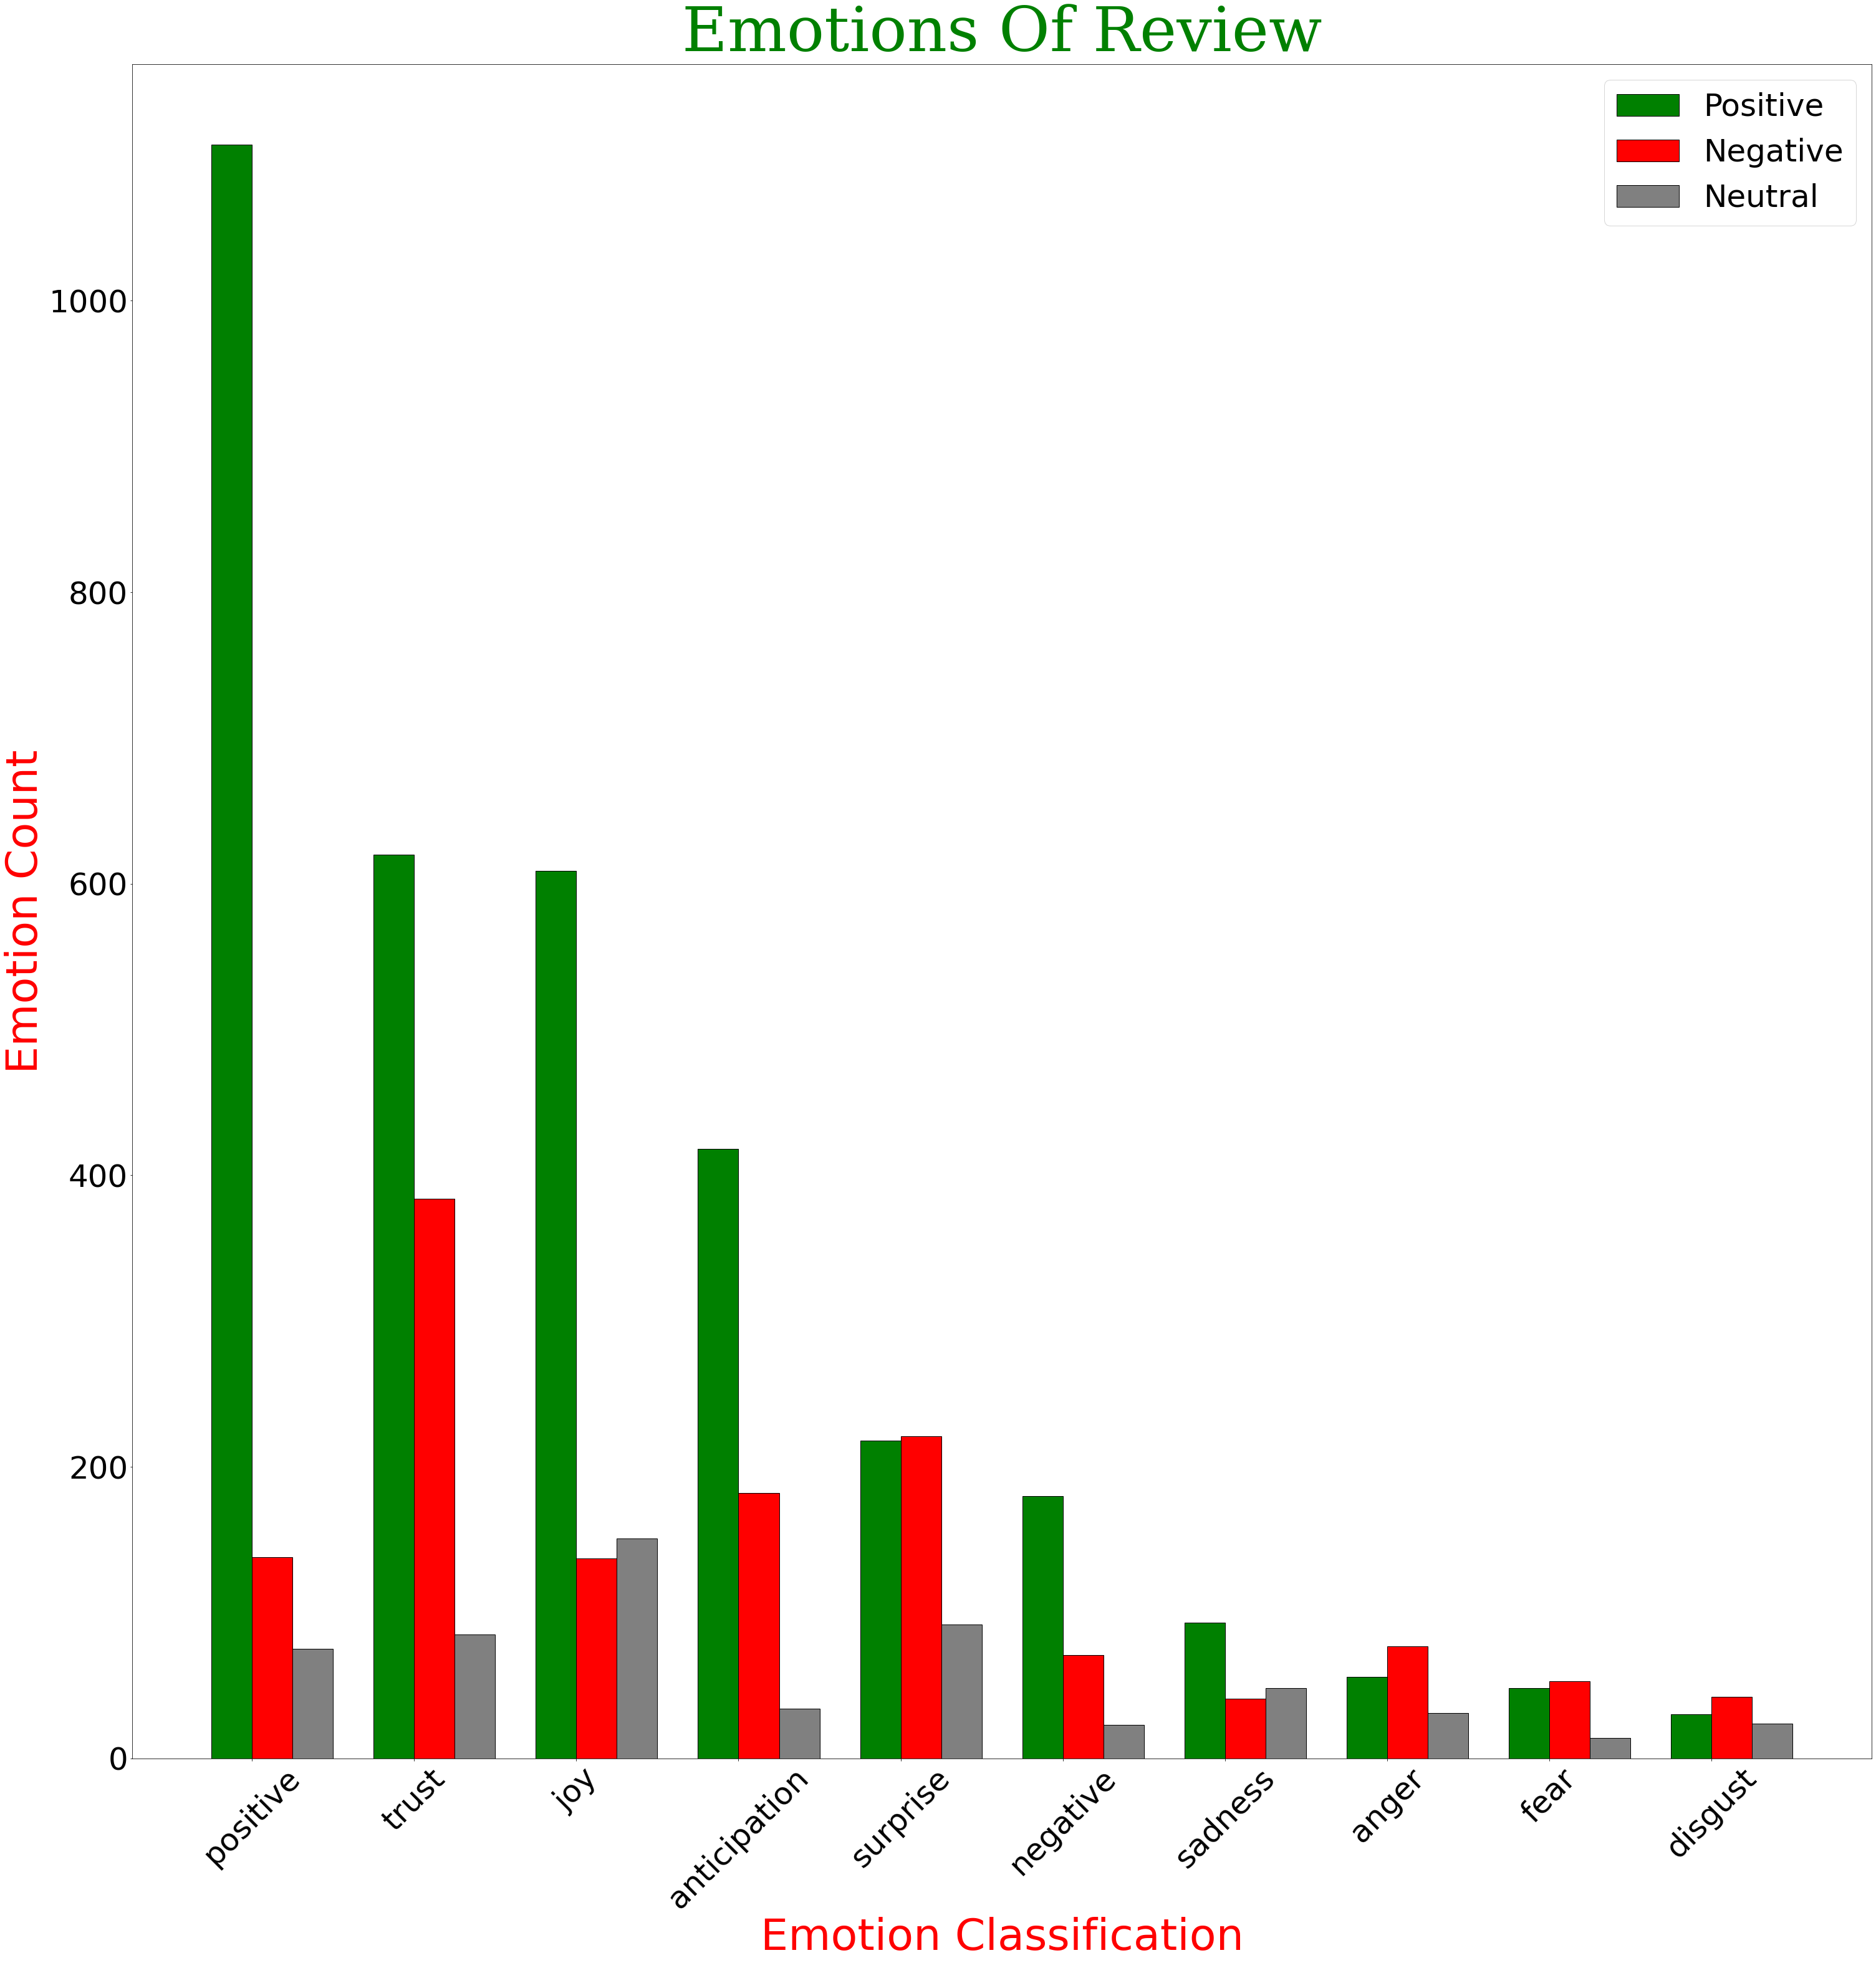

In [ ]:
import matplotlib.pyplot as plt

serif_font = {'fontname':'serif'}
r = np.arange(emotion_df.shape[0])
width = 0.25

plt.figure(figsize=(50,50))
  
plt.bar(r, emotion_df['Positive_Emotion Count'], color = 'g',
        width = width, edgecolor = 'black',
        label='Positive')
plt.bar(r + width, emotion_df['Negative_Emotion Count'], color = 'r',
        width = width, edgecolor = 'black',
        label='Negative')
plt.bar(r + 2*width, emotion_df['Neutral_Emotion Count'], color = 'grey',
        width = width, edgecolor = 'black',
        label='Neutral')

plt.xticks(size = 50,rotation = 45)
plt.yticks(size = 50)

plt.xlabel("Emotion Classification",fontsize = 70,color ='r')
plt.ylabel("Emotion Count",fontsize = 70,color ='r')
plt.title("Emotions Of Review",size =  100,**serif_font,color = 'Green')

plt.legend(['Positive', 'Negative','Neutral'], loc ="upper right",fontsize = 50)
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,list(emotion_df['Emotion Classification']))